# Training Models

Training a model consists in reducing the value of a specific loss/cost function. There are two ways to train it:
- <b>closed-form: </b> when exists a function that computes the best loss
- <b>Gradient Descent: </b>it's impossible to have a function that minimizes the loss, so the training is done by gradually tweaking the model parameter.

## Regression Model

A regression model is defined by:

$$ \hat{Y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n} $$ 

- $\theta_{j} $: is the model's parameter vector, including the bias term $\theta_{0}$ and the weights $\theta_{1}, \theta_{2}, ... \theta_{n} $
- $x$: is the feature vector
- $x_{n}$: is the feature vector at the $n^{th}$ position
- $ \hat{Y} $ is the predicted value


Training a model means setting up its parameters so the model performs well on the training set. In order to evaluate it's performance (how well or bad it is), we need to use a cost/fit function. Typically, in regressions problems its used a cost function called Root Mean Squared Error (RMSE).
Therefore, training a regression model consists in find the values of $\theta$ so that minimizes the RMSE.

<b>Note: </b> Many cases, the learning algorithm will optimize a different function than the performance measured by the final model, because it's easier to compute. This happens in this example, since RMSE is a squared root, it's easier to compute the Mean Square Error (MSE), and it leads to the same result because the value that minimizes a function also minimizes its squared root. 

The MSE is given by:

$$ MSE(x) = \frac{1}{m}*\sum^{m}_{i=1}(\mathbf{\theta}\cdot\mathbf{x}^{(i)} - y^{(i)})^2 $$

- $\mathbf{\theta}$: is the vector parameters that includes the bias term and the weights
- $\mathbf{x}$: is the features vector that contains $x_{i}$ to $x_{n}$, with $x_{0}$ always equals to 1.
- $\mathbf{\theta}\cdot\mathbf{x}^{(i)}$: is the dot product of $\mathbf{\theta}$ and $\mathbf{x}$ for the $i^{th}$ sample, which is equals to $\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$


### The Normal Equation

A simple linear regression model can be trained using a <i>close-form</i> equation, called <i>Normal Equation</i>:

$$ \hat\theta = (\mathbf{x}^{T}\mathbf{x})^{-1} \mathbf{x}^{T} y $$

- $\hat\theta$: is the value of $\theta$ that minimizes the cost function

Let's apply this into a linear looking data

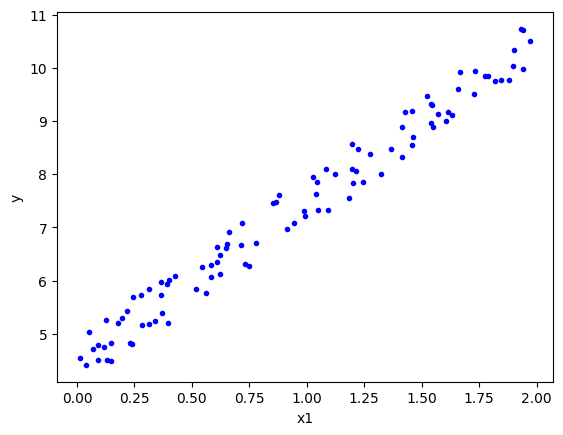

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set random state
np.random.seed(42)

# Generate the X and Y data (shape 100x1)
x = 2 * np.random.rand(100, 1) # shape [100x1]
y = 4 + 3 * x + np.random.rand(100, 1)

# plot
plt.plot(x, y, '.b')
plt.xlabel('x1')
plt.ylabel('y')
plt.show() 

In [8]:
# First we need to add x0=1 in all instances
x_b = np.c_[np.ones((100, 1)), x]

# Computing the theta using the normal equation
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print(theta_best)

[[4.51359766]
 [2.98323418]]


We should expect a value of $\theta_{0}=3$ and $\theta_{1}=4$.However, the data has noise making impossible to recover the exact parameters

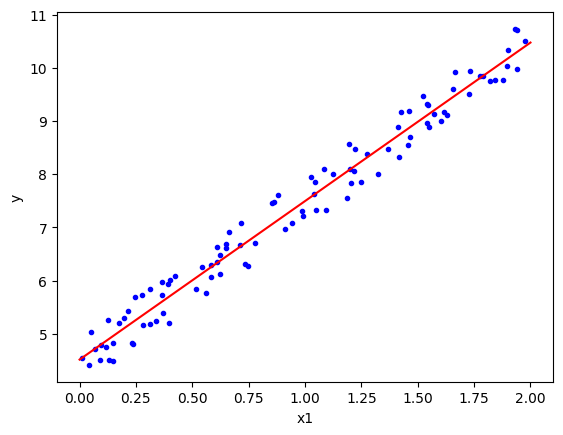

In [11]:
# Now we can can plot the regression line 
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_pred = x_new_b.dot(theta_best)

# plot
plt.plot(x, y, '.b')
plt.plot(x_new, y_pred, '-r')
plt.xlabel('x1')
plt.ylabel('y')
plt.show() 

All these steps can be done using the Sklearn linear regression

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, lin_reg.coef_)

[4.51359766] [[2.98323418]]


As we can see the values are exactly the same.